# **Setup**

1. Go to [Dataset](https://www.kaggle.com/datasets/amitvkulkarni/impact-of-product-positioning-on-sales) and click download
2. Extract the contents of the zip file
3. Run the code cell and choose Product Positioning.csv to upload



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Product_Positioning.csv to Product_Positioning.csv


In [ ]:
import pandas as pd
data = pd.read_csv("/content/Product_Positioning.csv")    # IF IT DOES NOT WORK, try adding an underscore where the space is
data.head()

,Product ID,Product Position,Price,Competitor's Price,Promotion,Foot Traffic,Consumer Demographics,Product Category,Seasonal,Sales Volume
0,185102,Aisle,17.07,16.16,No,Medium,Families,Clothing,No,2823
1,188771,Aisle,17.41,13.13,No,Low,Seniors,Clothing,No,654
2,180176,End-cap,43.16,38.37,Yes,Medium,Young adults,Electronics,Yes,2220
3,112917,Aisle,42.26,38.98,Yes,Low,Families,Clothing,Yes,1568
4,192936,End-cap,47.94,45.59,No,Medium,College students,Clothing,Yes,2942


In [ ]:
data.shape

(1000, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product ID             1000 non-null   int64  
 1   Product Position       1000 non-null   object 
 2   Price                  1000 non-null   float64
 3   Competitor's Price     1000 non-null   float64
 4   Promotion              1000 non-null   object 
 5   Foot Traffic           1000 non-null   object 
 6   Consumer Demographics  1000 non-null   object 
 7   Product Category       1000 non-null   object 
 8   Seasonal               1000 non-null   object 
 9   Sales Volume           1000 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 78.2+ KB


In [ ]:
data.isnull().sum()

Product ID               0
Product Position         0
Price                    0
Competitor's Price       0
Promotion                0
Foot Traffic             0
Consumer Demographics    0
Product Category         0
Seasonal                 0
Sales Volume             0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.drop('Product ID', axis = 1).describe()

,Price,Competitor's Price,Sales Volume
count,1000.000000,1000.000000,1000.000000
mean,28.020010,25.550110,1769.311000
std,13.067876,13.156466,718.386603
min,5.060000,0.720000,507.000000
25%,16.917500,14.277500,1136.500000
50%,28.680000,26.145000,1791.500000
75%,39.332500,37.125000,2363.750000
max,49.980000,49.850000,2999.000000


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Q1: What is the relationship between the price of a product and its sales volume, compared to competitor's prices?

This is an important question to explore because it will allow us to visualize the correlation between the price of a product and its sales volume is there is any correlation. If we are able to view any sort of correlation we can then use lmplot to display the predicted sales volume based on the price. Many people may think that lower price would attract more customers in turn leading to more sales volume, however lower prices could indicate bad quality to some customers and impact the sales volume negatively. We will also display the competitor prices as the size of our points. It is important to analyze this as well because it could show information into the market for that product. Visualizing the correlation between product price, competitor price, and sales volume can help businesses determine prices when trying to increase sales volume.

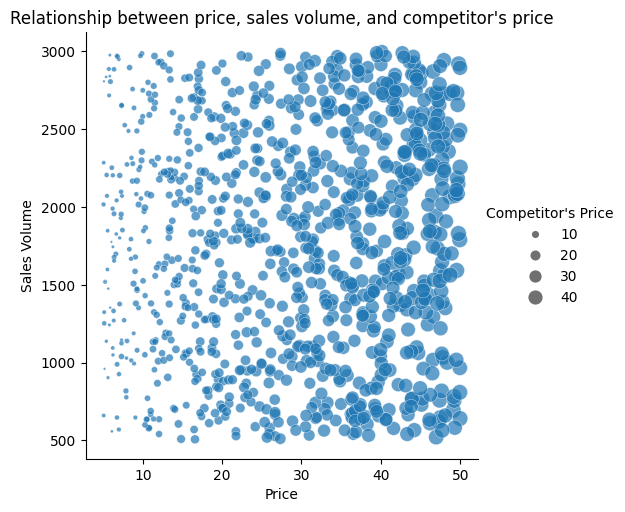

In [ ]:
sns.relplot(
    data=data,
    x='Price',
    y='Sales Volume',
    size='Competitor\'s Price',
    sizes=(2, 130),
    alpha = 0.7,
)
plt.title("Relationship between price, sales volume, and competitor's price");

From our relationship plot above, I was suprised by our results. It seems that there is no relationship between the price of a product and its sales volume. We can see that the relationship between the price of a product and it's competitors is positive, which is seen from the size of the dots getting larger as we increase in price. Generally speaking about our dataset, it seems like we have more products around the \$40-\$50 range

# Q2: How does the presence of a promotion impact sales volume

This question is important because it will allow us to see just how much a promotion would impact sales volume. Visualizing the impact of a promotion across different product types could impact marketing campaigns for that paticular product. It could help determine wether or not spending money on a promotion would be worth it in an attempt to increase sales volume or would not be worth the effort. This could help companies manage their budget and choose what products to promote vs what not to promote. In general studying the effect a promotion allows businesses to better understand their audience and tailor their future promotion strategies.

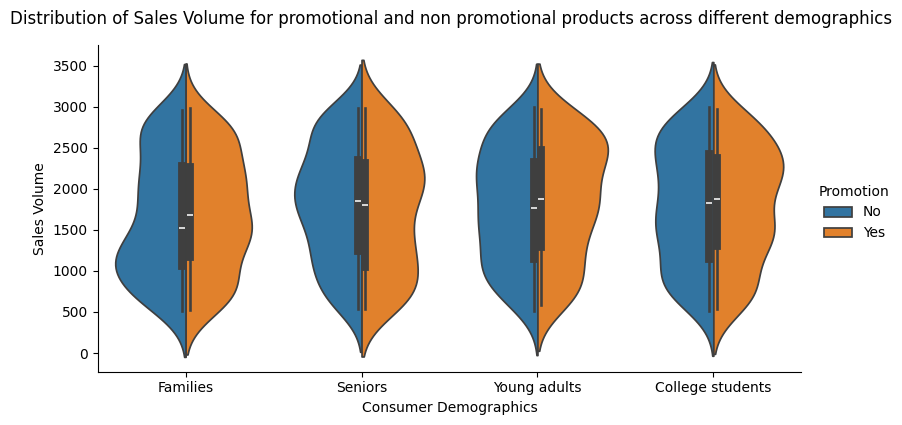

In [ ]:
g=sns.catplot(
    data=data,
    x="Consumer Demographics",
    y="Sales Volume",
    kind="violin",
    hue = "Promotion",
    split = True,
    height = 4,
    aspect =2,

    )

g.fig.suptitle("Distribution of Sales Volume for promotional and non promotional products across different demographics", y=1.05);

My original hypothesis that a promotion would impact sales volume looks to be true. From our violin plots we can see that a promotion would positively impact sales volume across all the demographics besides Seniors where it actually led to less sales volume. This may be because seniors are less likely to view advertisments/media that is associated with a promotion. From our plots we can see that a promotion provided the most increase in sales volume when targeting families and young adults

# Q3: How does foot traffic near the product's location influence sales volume?

For this question we are looking to explore how much foot traffic has an impact on sales volume. This is an important factor to know because as a store owner, if I understand the correlation between foot traffic and sales I will strategically place items in my store. If there are certain items that possess qualities that make it a low seller, I would try and place it somewhere to make it a higher seller.

<ipython-input-13-2da4a0bf0210>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


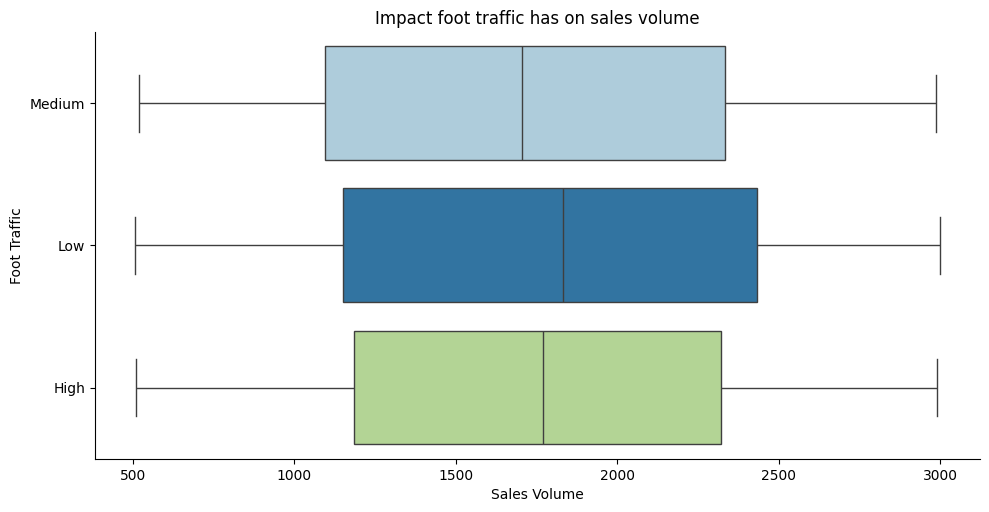

In [ ]:
sns.catplot(
    data = data,
    x = 'Sales Volume',
    y = 'Foot Traffic',
    kind = 'box',
    aspect= 2,
    palette="Paired"
)
plt.title("Impact foot traffic has on sales volume");

From the box plots we can see that there are no outliers in any of our foot traffics. All of the plots have practically identical minimum and maximums with the exception of the medium foot traffic being slightly smaller. What caught me by suprise is that the low foot traffic had the highest median following by high foot traffic and medium foot traffic. The high foot traffic also has the smallest interquartile range. The smaller IQR means that when it comes to high foot traffic items, there is less variablity in sales volume than low foot traffic and medium foot traffic items. This could suggest that high foot traffic translates to steady sales, with less variation in the number of products sold.

# Q4: Are there specific consumer demographics that are more likely to purchase certain product categories?

This is an important question to explore because it will allow us to see if there is any relationship between the types of products being purchased and who is most likely to purchase them. If we are able to see which demographic is more likely to buy a certain product it will allow companies to create more targeted marketing campaigns. This could overall improve their return on investment when it comes to their marketing expenses. Not only that but understanding which demographics lead the sales volume on a particular product can help guide product development and innovation. If businesses know who is buying their products, it will allow them to adapt their products to meet the needs and preferences of those groups. The opposite is true as well, if they want to increase their sales to a particular demographic they can adjust their product to meet their needs.

<Figure size 1200x600 with 0 Axes>

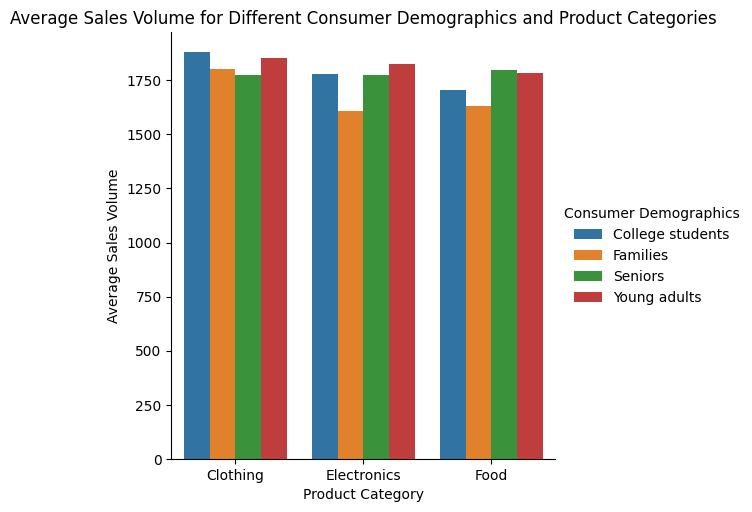

In [ ]:

# Group by Consumer Demographics and category and then get the average sales volume
grouped_df = data.groupby(['Consumer Demographics', "Product Category"])['Sales Volume'].mean().reset_index();

plt.figure(figsize=(12, 6));
sns.catplot(data=grouped_df,
            hue='Consumer Demographics',
            x='Product Category',
            y='Sales Volume',
            kind = 'bar')


plt.title('Average Sales Volume for Different Consumer Demographics and Product Categories');
plt.ylabel('Average Sales Volume');

In this bar plot we are able to clearly visualize which demographics are more likely to buy certain products. The average sales volume is displayed along with the different product categories and the different colors reperesent the different demographics. We can see that college students buy the most clothing on average.Young adults purchase the most electronics, and seniors purchase the most food. What caught me by suprise is that families are the least when it comes to food

# Q5: How does the combination of high foot traffic and promotional activities affect the sales volume of products?
With this question, we are looking to see how much of an impact products with high foot traffic and a promotion have on sales volume. We will be comparing them to every other product that does not have a promotion or high foot traffic. Identifying the relationship between high foot traffic and promotional items will help businesses capitalize on opportunities to maximize their sales volume. Hypothetically we would probably expect to see these products have more sales volume, however the impact of how much these increase sales volume is what we specifically want to look at. This is allow businesses to see if the return on investment would be worth it for placing these items in high foot traffic areas and running promotions.



<ipython-input-15-e24f4c1d513c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hi_and_promo['Type'] = 'High Foot Traffic & Promotion'
<ipython-input-15-e24f4c1d513c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  everything_else['Type'] = 'Everything Else'


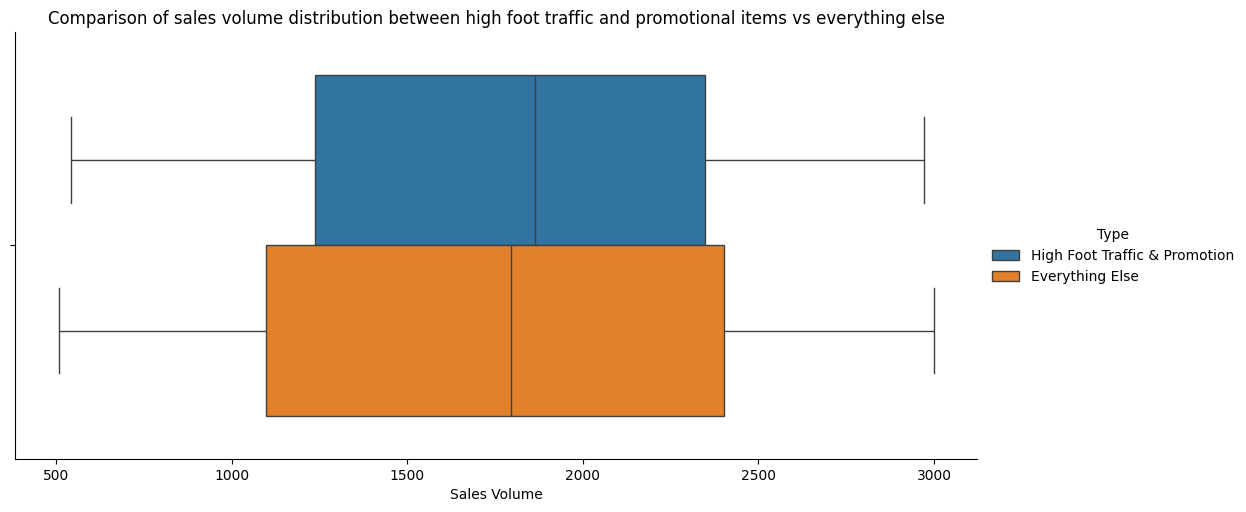

In [ ]:
hi_and_promo = data[(data.Promotion == 'Yes') & (data['Foot Traffic'] == 'High')]
everything_else = data[(data.Promotion != 'Yes') & (data['Foot Traffic'] != 'High')]

hi_and_promo['Type'] = 'High Foot Traffic & Promotion'
everything_else['Type'] = 'Everything Else'
combined = pd.concat([hi_and_promo, everything_else])

sns.catplot(
    data=combined,
    x='Sales Volume',
    kind='box',
    aspect=2,
    hue='Type'
)


plt.title('Comparison of sales volume distribution between high foot traffic and promotional items vs everything else');

As we can see in the the two box plots, there are no outliers when comparing the two subsets. The high foot traffic and promotion subset as a slightly larger minimum and a slightly smaller maximum. The high foot traffic and promotion subset also has a larger median in comparison to the other subset. The IQR of the high foot traffic and promotional subset is much smaller in comparision to the other subset. The smaller IQR means that when it comes to high foot traffic and promotional items, there is less variablity in sales volume than the other items. This could suggest that high foot traffic and a promotion along with it translates to steady sales, with less variation in the number of products sold.

# Question 6: How does product positioning (e.g., Front of Store, End-cap, Aisle) affect sales volume?

This questions explores which product locations sell best. This would be helpful to know where to place what type of product to ensure the best chance of the product selling. This information may be combined with seasonal items to further boost sales and sell as many items during their season as possible and boost profits.

<Figure size 1200x600 with 0 Axes>

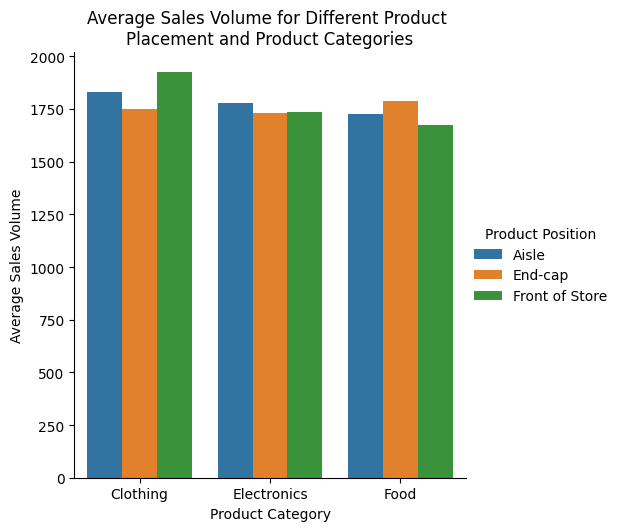

In [ ]:
grouped_df2 = data.groupby(['Product Category', 'Product Position']).mean('Sales Volume')

plt.figure(figsize=(12, 6))
sns.catplot(data=grouped_df2,
            hue='Product Position',
            x='Product Category',
            y='Sales Volume',
            kind = 'bar')


plt.title('Average Sales Volume for Different Product \nPlacement and Product Categories')
plt.ylabel('Average Sales Volume');

The results are mixed -- for clothing, front of store sells best; for electronics, aisle sells best; and for food, end-cap sells best. Overall, aisle product placement seems to do the best for best with consistent sales, which makes sense because there is probably the most real estate there. More products placed there to sell leads to more products sold.

# Question 7: What impact does seasonality have on the sales volume of products, and does it vary by product category?

This is helpful to aid stores in planning what seasonal products to sell as well as how many to order. For example, seasonal electronics such as Christmas lights may sell better than seasonal clothing, which would lead the store to stock more lights than clothing because they anticipate higher sales volume.

<Figure size 1200x600 with 0 Axes>

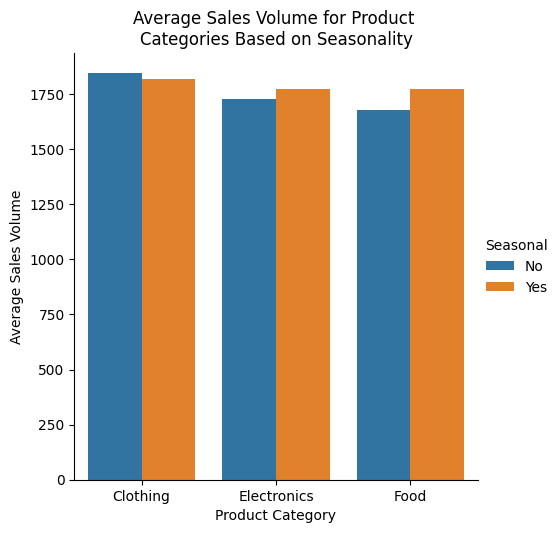

In [ ]:
grouped_df3 = data.groupby(['Product Category', 'Seasonal']).mean('Sales Volume')

plt.figure(figsize=(12, 6))
sns.catplot(data=grouped_df3,
            hue='Seasonal',
            x='Product Category',
            y='Sales Volume',
            kind = 'bar')


plt.title('Average Sales Volume for Product \nCategories Based on Seasonality')
plt.ylabel('Average Sales Volume');

# Question 8: Which product categories perform best in terms of sales volume within each type of product position?

This is helpful to inform the store what products to place based on location. With this information, item sales volume can be maximized based on the item type and certain locations can be designated for certain item types.

<Figure size 1200x600 with 0 Axes>

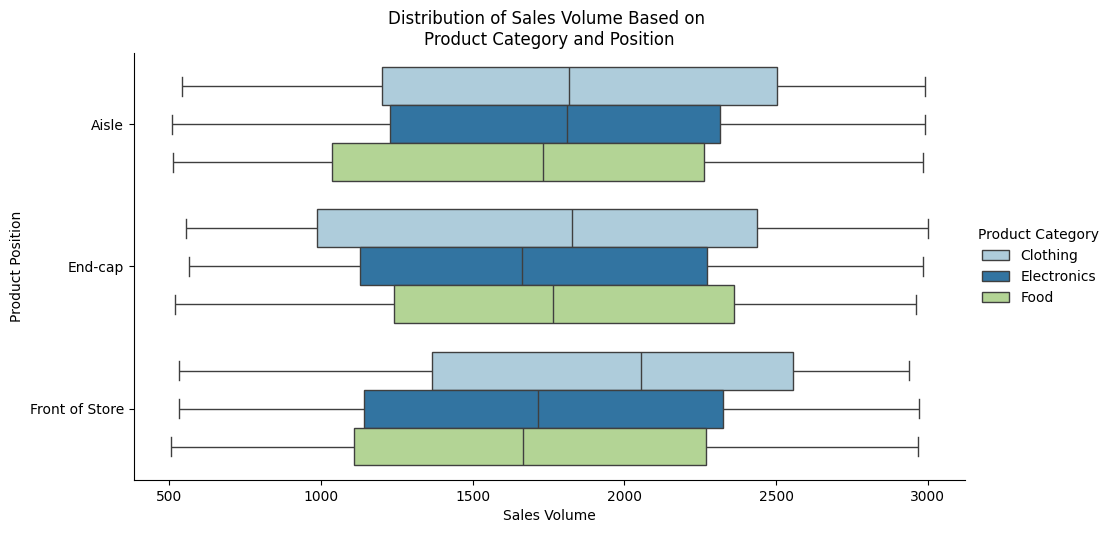

In [ ]:
plt.figure(figsize=(12, 6))
sns.catplot(
    data = data,
    x = 'Sales Volume',
    y = 'Product Position',
    kind = 'box',
    aspect= 2,
    hue = 'Product Category',
    palette="Paired"
)
plt.title("Distribution of Sales Volume Based on \nProduct Category and Position");

Clothing seems to have a higher median sales volume than both electronics and food regardless of location, so the store might want to stock clothing items the most.

The only exception is that electronics seem to have a very slightly lower median sales volume when placed in an aisle spot.


# Question 9: Is there a difference in pricing based on the consumer demographics (ex: lower price for seniors/college students, higher price for families, etc.)?

This could be used to make prices more equal across all demographics, or it could be used to adjust prices to make items more accessible. We predict that seniors and college students would have similar low pricing on necessities (food and clothing) due to both demographics' limited income.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 1200x600 with 0 Axes>

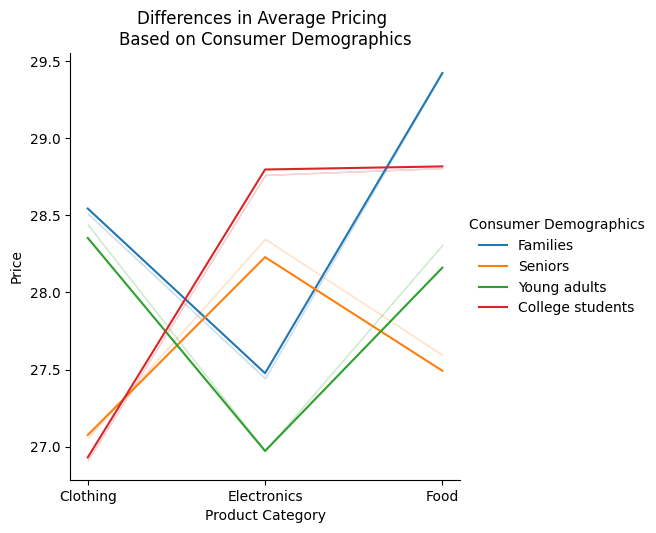

In [ ]:
plt.figure(figsize=(12, 6))
sns.relplot(data=data,
            hue='Consumer Demographics',
            x='Product Category',
            y='Price',
            kind = 'line',
            ci = 0)

plt.title('Differences in Average Pricing \nBased on Consumer Demographics');

Our prediction stated above with the question was partially correct -- both seniors and college students had low pricing for clothing and seniors had low pricing for food, but college students seemed to pay higher prices overall for food than both young adults and seniors. An unexpected observation is that seniors seemed to pay relatively high prices for electronics; much higher than young adults, who spent the least on electronics.

# Question 10: Is there a relationship between the difference in price (store - competitor's price) and the consumer demographics of the product?

This would give insight into whether a certain demographic chooses to shop at the competitor's store if there is a large difference in prices. For example, college students might be more willing to shop around at different stores to find a lower price than seniors would be willing to.

In [ ]:
data['$__ more expensive than competitor'] = data['Price'] - data["Competitor's Price"]
store_minus_comp = data[['Product Position', '$__ more expensive than competitor']]
data['$__ more expensive than competitor'].describe()

count    1000.000000
mean        2.469900
std         1.450645
min         0.000000
25%         1.160000
50%         2.515000
75%         3.710000
max         4.990000
Name: $__ more expensive than competitor, dtype: float64

The minimum is 0, meaning that our store does not have a lower price than their competitor, and the maximum is 4.99, meaning that there is at least one item ~\$5 more expensive at our store vs the competitor. On average, buying an item at our store is nearly \$2.50 more expensive than buying it at their competitor store.

<ipython-input-21-8ef87e290347>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


<Figure size 1200x600 with 0 Axes>

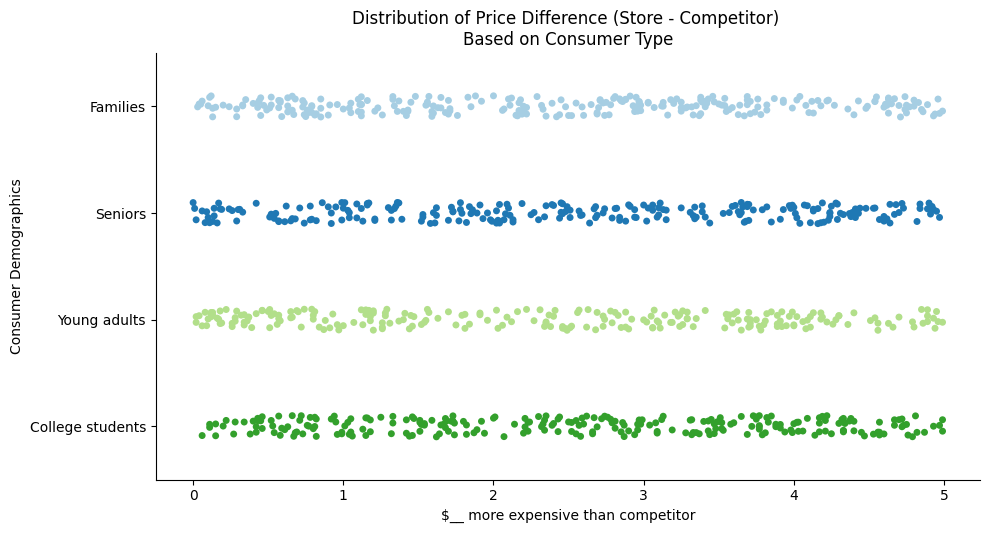

In [ ]:
plt.figure(figsize=(12, 6))
sns.catplot(
    data = data,
    x = '$__ more expensive than competitor',
#    kind = 'box',
    aspect= 2,
    y = 'Consumer Demographics',
    palette= "Paired"
)
plt.title("Distribution of Price Difference (Store - Competitor) \nBased on Consumer Type");

There does not seem to be any noticeable trend and all data seems to be more-or-less evenly spaced out. This means that our hypothesis was wrong and that college students, or any demographic for that matter, seems to care that this store charges higher prices for the same item compared to the competing store.

**Insights our model may be able to do**

With our dataset, we are looking to create a machine learning model that can predict sales volume based on our features we have. This is an important task when it comes to business because it will allow busineses to maximize their return on investment when marketing their products. Often times it may cost a company more money to place their items in a certain postion in a store or to run a promotion. Understanding the effects these different features have on sales volume will allow businesses to strategically manipulate their marketing campaigns to increase their sales volume based on their target demographics, price, competitor price, and product type etc.

Prepping ML Data

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=100) #splitting 80 20 %
training_values = train_set.drop(["Sales Volume","Product ID"], axis=1) # drop labels for training set
training_labels = train_set["Sales Volume"].copy()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Pipeline for numerical attributes
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Fill missing numerical values with median
])

# Pipeline for categorical attributes
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), ##most frequent for missing values
    ('encoder', OneHotEncoder()), ##one hot encoding categories
])



num_attribs = ['Price', 'Competitor\'s Price']
cat_attribs = ['Product Position', 'Promotion', 'Foot Traffic', 'Consumer Demographics', 'Product Category', 'Seasonal']

#creating full pipeline
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

training_values = full_pipeline.fit_transform(training_values) ##applying pipline

Random forest model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

param_grid = [
    {'n_estimators': [3, 10, 30, 50], 'max_features': [2, 4, 6, 8, 10]},
    {'bootstrap': [False], 'n_estimators': [3, 10, 30], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor(random_state=100)
grid_search_forest = GridSearchCV(forest_reg, param_grid, cv=10, #10 fold cross validation
                           scoring='neg_mean_squared_error', return_train_score=True)

grid_search_forest.fit(training_values, training_labels)


print("Best parameters for Random Forest:", grid_search_forest.best_params_)

# Convert the to RMSE
best_rmse = np.sqrt(-grid_search_forest.best_score_)
print("Best RMSE found:", best_rmse)


Best parameters for Random Forest: {'max_features': 6, 'n_estimators': 50}
Best RMSE found: 764.0072617766797


View feature importance

In [ ]:
feature_importances = grid_search_forest.best_estimator_.feature_importances_
cat_encoder = full_pipeline.named_transformers_["cat"]

one_hot_encoder = cat_encoder.named_steps["encoder"]

cat_one_hot_attribs = list(one_hot_encoder.get_feature_names_out()) ##gotten from chatgbt to get the feature names

attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)


[(0.27211939009746605, "Competitor's Price"),
 (0.26876630473001784, 'Price'),
 (0.03155231291754263, 'x0_Front of Store'),
 (0.03138662839967518, 'x4_Food'),
 (0.03034779559520113, 'x0_End-cap'),
 (0.029293412183937904, 'x1_No'),
 (0.02827846242182466, 'x2_Medium'),
 (0.028205159966402, 'x2_Low'),
 (0.028056740197708444, 'x1_Yes'),
 (0.027997057383810944, 'x0_Aisle'),
 (0.027160141815567605, 'x4_Electronics'),
 (0.02699655953702939, 'x4_Clothing'),
 (0.02629511699118145, 'x2_High'),
 (0.025448625672342618, 'x3_College students'),
 (0.025204755790809674, 'x3_Seniors'),
 (0.024768981816530113, 'x3_Families'),
 (0.023426754485405262, 'x5_No'),
 (0.023245785383071302, 'x3_Young adults'),
 (0.0214500146144759, 'x5_Yes')]

None of our features have much impact besides competitors price and price. We can try dropping the other features and see if it make a difference.

In [ ]:
##BUILDING PIPELINE ONLY FOR NUMERICAL ATTRIBUTES
only_price_train_set, only_price_test_set = train_test_split(data, test_size=0.2, random_state=100)
only_price_values = train_set.drop(["Sales Volume","Product ID", "Promotion", "Foot Traffic", "Consumer Demographics", "Product Category", "Seasonal"], axis=1) # drop labels for training set
only_price_labels = train_set["Sales Volume"].copy()

# Pipeline for numerical attributes
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Fill missing numerical values with median
])
num_attribs = ['Price', 'Competitor\'s Price']


only_price_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
    ])

only_price_values = only_price_pipeline.fit_transform(only_price_values)

In [ ]:
##RUNNING SAME FOREST REGRESSION BUT WITH LESS FEATURES

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

param_grid = [
    {'n_estimators': [3, 10, 30, 50], 'max_features': [2, 4, 6, 8, 10]},
    {'bootstrap': [False], 'n_estimators': [3, 10, 30], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor(random_state=100)
grid_search_forest_only_price = GridSearchCV(forest_reg, param_grid, cv=10,
                           scoring='neg_mean_squared_error', return_train_score=True)

grid_search_forest_only_price.fit(only_price_values, only_price_labels)


print("Best parameters for Random Forest:", grid_search_forest_only_price.best_params_)

# Convert the best negative mean squared error to RMSE for interpretability
best_rmse = np.sqrt(-grid_search_forest_only_price.best_score_)
print("Best RMSE found:", best_rmse)


Best parameters for Random Forest: {'max_features': 2, 'n_estimators': 50}
Best RMSE found: 793.9181121671177


Our rmse got worse so it is best to keep the other features

In [ ]:
from sklearn.svm import SVR


param_grid = [
    {
      'C': [int(x) for x in np.linspace(start=1, stop=10, num=8)],  #8 equal splits from 1-10
      'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    }
]

svm = SVR()
grid_search_svr = GridSearchCV(svm, param_grid, cv=10,
                           scoring='neg_mean_squared_error', return_train_score=True)

grid_search_svr.fit(training_values, training_labels)

# Display the best parameters
print("Best parameters for SVM Regression:", grid_search_svr.best_params_)

# Convert the best negative mean squared error to RMSE for interpretability
best_rmse = np.sqrt(-grid_search_svr.best_score_)
print("Best RMSE found:", best_rmse)


Best parameters for SVM Regression: {'C': 2, 'kernel': 'rbf'}
Best RMSE found: 723.603404605367


SVM is better performing than random forest

Linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression

param_grid = [
    {'copy_X': [False, True], 'fit_intercept': [False, True], 'positive': [False, True]}
  ]

lm = LinearRegression()

grid_search_lm = GridSearchCV(lm, param_grid, cv=10,
                           scoring='neg_mean_squared_error', return_train_score=True)

grid_search_lm.fit(training_values, training_labels)

# Display the best parameters
print("Best parameters for Linear Regression:", grid_search_lm.best_params_)

# Convert the best negative mean squared error to RMSE for interpretability
best_rmse = np.sqrt(-grid_search_lm.best_score_)
print("Best RMSE found:", best_rmse)

Best parameters for Linear Regression: {'copy_X': False, 'fit_intercept': False, 'positive': True}
Best RMSE found: 727.406461955441


SVM still performs the best of the three models in terms of RMSE.

## Running the test data

In [ ]:
testing_values = test_set.drop(["Sales Volume","Product ID"], axis=1) # drop labels for training set
testing_labels = test_set["Sales Volume"].copy()

In [ ]:
testing_values = full_pipeline.fit_transform(testing_values)

In [ ]:
# we want to use SVM with the following parameters {'C': 2, 'kernel': 'rbf'}
from sklearn.metrics import mean_squared_error

final_model = SVR(C = 2, kernel = 'rbf').fit(training_values, training_labels)

final_predictions = final_model.predict(testing_values)

final_mse = mean_squared_error(testing_labels, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

705.7470643098123

## Model Evaluations

Check random forest RSME and coefficient of determination to determine error sizes and to see how well the line fits the data.

In [ ]:
from sklearn.metrics import mean_squared_error

# we want to use random forest with the following parameters: {'max_features': 6, 'n_estimators' : 50}
final_RF_model = RandomForestRegressor(max_features = 6, n_estimators = 50).fit(training_values, training_labels)

final_RF_predictions = final_RF_model.predict(testing_values)

final_RF_mse = mean_squared_error(testing_labels, final_RF_predictions)
final_RF_rmse = np.sqrt(final_RF_mse)
final_RF_rmse

752.3932041731903

In [ ]:
from sklearn.metrics import r2_score

RF_r2 = r2_score(testing_labels, final_RF_predictions)
RF_r2

-0.15447593504875634

Check SVR RSME and coefficient of determination to determine error sizes and to see how well the line fits the data.

In [ ]:
# we want to use SVM with the following parameters: {'C': 2, 'kernel': 'rbf'}

final_SVR_model = SVR(C = 2, kernel = 'rbf').fit(training_values, training_labels)

final_SVR_predictions = final_SVR_model.predict(testing_values)

final_SVR_mse = mean_squared_error(testing_labels, final_SVR_predictions)
final_SVR_rmse = np.sqrt(final_SVR_mse)
final_SVR_rmse

705.7470643098123

In [ ]:
SVR_r2 = r2_score(testing_labels, final_SVR_predictions)
SVR_r2

-0.01576516907794412

Check linear regression RSME and coefficient of determination to determine error sizes and to see how well the line fits the data.

In [ ]:
# we want to use linear regression with the following parameters: {'copy_X': False, 'fit_intercept' : False, 'positive': True}
final_LR_model = LinearRegression(copy_X = False, fit_intercept = False, positive = True).fit(training_values, training_labels)

final_LR_predictions = final_LR_model.predict(testing_values)

final_LR_mse = mean_squared_error(testing_labels, final_LR_predictions)
final_LR_rmse = np.sqrt(final_LR_mse)
final_LR_rmse

709.0689038898288

In [ ]:
LR_r2 = r2_score(testing_labels, final_LR_predictions)
LR_r2

-0.025349764032838618

<Figure size 1200x600 with 0 Axes>

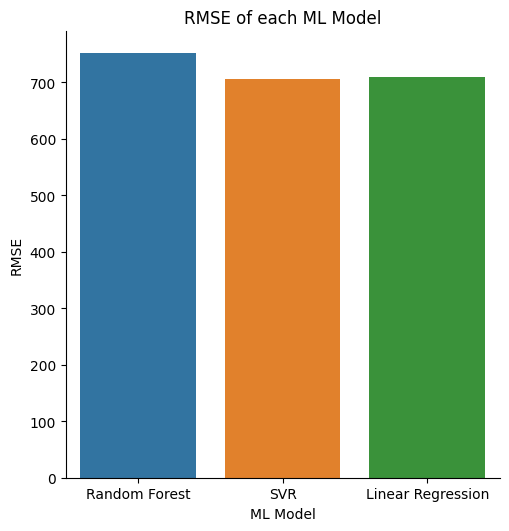

In [ ]:
# make a visual to compare the accuruacy measurements
measures = pd.DataFrame({'Random Forest': [final_RF_rmse, RF_r2],
                         'SVR': [final_SVR_rmse, SVR_r2], 'Linear Regression': [final_LR_rmse, LR_r2]})
measures.index = ['RMSE', 'R^2']

plt.figure(figsize=(12, 6))
sns.catplot(data=measures[0:1],
            kind = 'bar')

plt.title('RMSE of each ML Model')
plt.xlabel('ML Model')
plt.ylabel('RMSE');

<Figure size 1200x600 with 0 Axes>

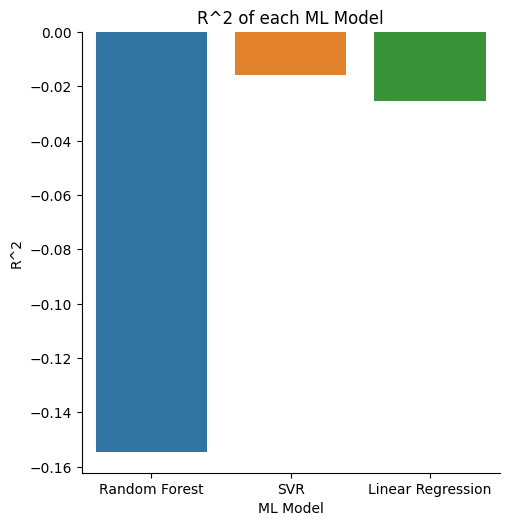

In [ ]:
plt.figure(figsize=(12, 6))
sns.catplot(data=measures[1:2],
            kind = 'bar')

plt.title('R^2 of each ML Model')
plt.xlabel('ML Model')
plt.ylabel('R^2');

### Make a correlation heatmap to see if any variables are related. If they are not, it could explain why the ML models are not very accurate or have a strong correlation.

Text(0.5, 1.0, 'Correlation Matrix between features \n Poor scores across most features')

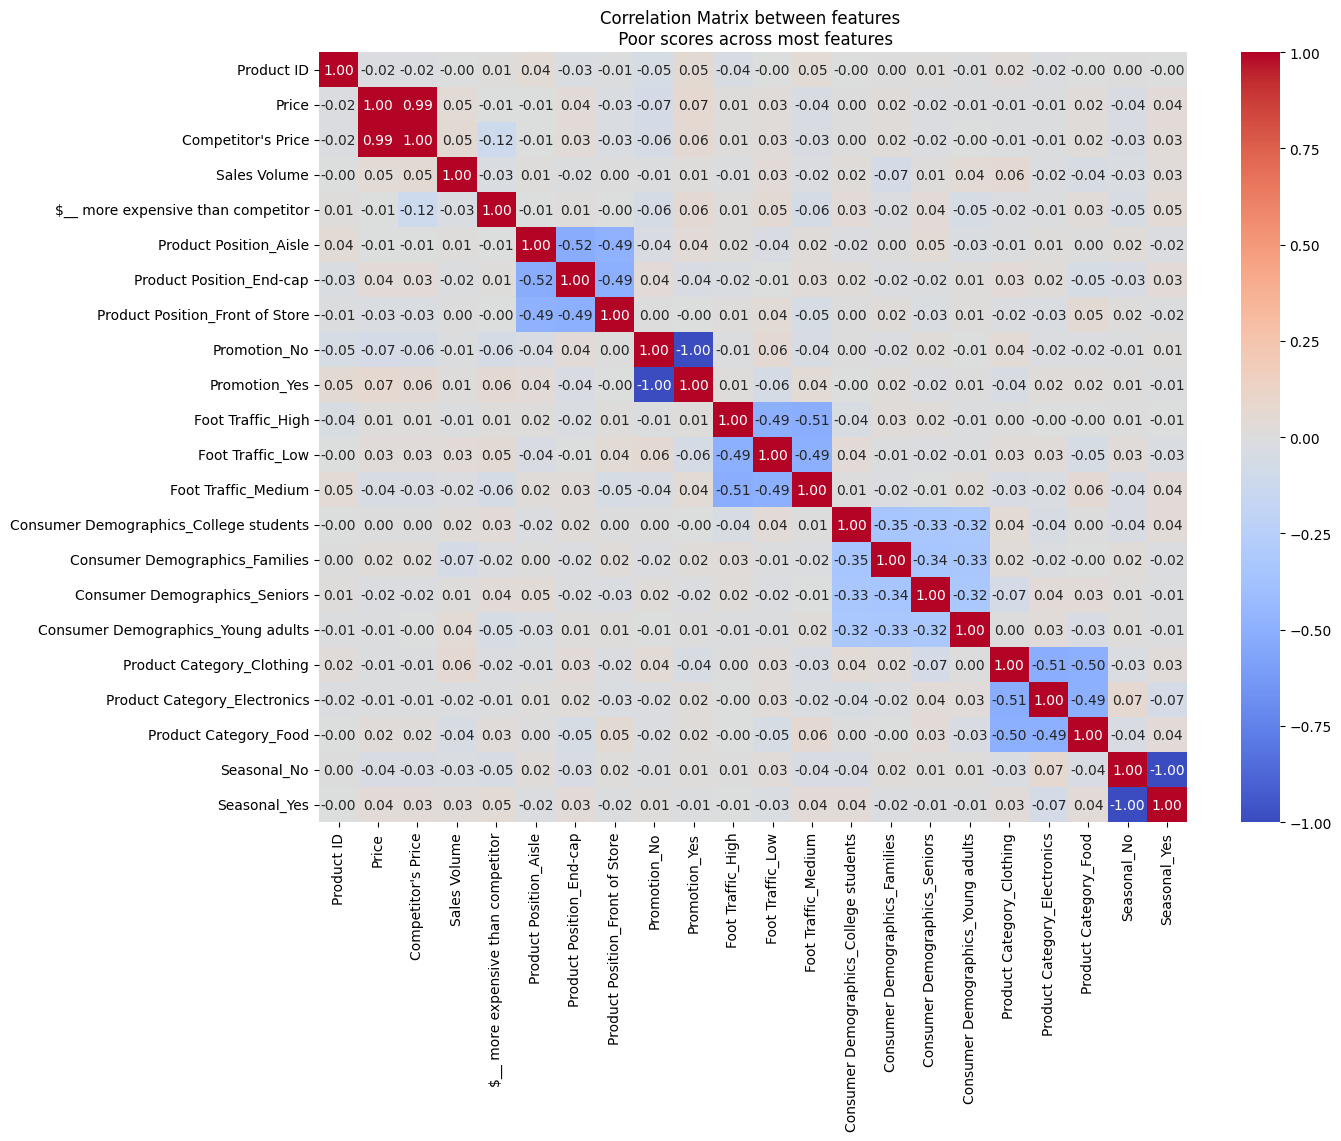

In [ ]:
encoded = pd.get_dummies(data) #encode categorical values

matrix = encoded.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between features \n Poor scores across most features')